In [237]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('cosmetic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 8 columns):
Label          1630 non-null object
URL            1630 non-null object
brand          1626 non-null object
name           1626 non-null object
price          1626 non-null object
rank           1624 non-null float64
skin_type      1626 non-null object
ingredients    1625 non-null object
dtypes: float64(1), object(7)
memory usage: 102.0+ KB


In [171]:
#classify brand names as Korean/Western
korean_brands = ['LANEIGE', 'AMOREPACIFIC', 'DR. JART+', 'GLOW RECIPE', 'TOO COOL FOR SCHOOL', 'SON & PARK', 'J. ONE']
japanese_brands = ['TATCHA', 'SK-II', 'KOH GEN DO']
df['Classification'] = ['KOREAN' if val in korean_brands else 'JAPANESE' if val in japanese_brands else 'WESTERN' for val in df['brand']]
# df2 = df.drop(columns=['Korean/Western'])
# df2.head()
df.head()

,Label,URL,brand,name,price,rank,skin_type,ingredients,Category,ingredients_final,Chem?,Classification
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",False,WESTERN
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...","-Pitera™: A bio-ingredient rich in vitamins, o...","-Pitera™: A bio-ingredient rich in vitamins, o...",False,JAPANESE
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,False,WESTERN
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",False,WESTERN
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,-Collagen: Supports skin elasticity for a yout...,-Collagen: Supports skin elasticity for a yout...,False,WESTERN


In [220]:
#search for the number of products that contain chemicals in chemical list
df['ingredients_final'] = df['ingredients']
chemical_list = ['Titanium Dioxide', 'Talc', 'Benzophenone', 'Ginkgo Biloba Extract', 'Carbon Black']

df['Chem?'] = df['ingredients'].str.contains('|'.join(chemical_list))
#check if there are any null values
df['ingredients'].isnull().values.any()
#drop NA values
df2 = df.dropna()
# df2.head()
# df2['Chem?'].unique()
df2.reset_index()
df2.head()

,Label,URL,brand,name,price,rank,skin_type,ingredients,Category,ingredients_final,Chem?,Classification
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",False,WESTERN
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...","-Pitera™: A bio-ingredient rich in vitamins, o...","-Pitera™: A bio-ingredient rich in vitamins, o...",False,JAPANESE
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,False,WESTERN
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",False,WESTERN
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,-Collagen: Supports skin elasticity for a yout...,-Collagen: Supports skin elasticity for a yout...,False,WESTERN


In [160]:
for index,row in df2.iterrows():
    if row.str.contains('Titanium Dioxide', na=False).any():
        df.loc[index, 'ingredients_final'] = 'Titanium Dioxide'
# df2.loc[df2['ingredients_final'].str.contains('Titanium Dioxide', case=False), 'ingredients_final'] = 'Titanium Dioxide'
# df2.head()
# df2.loc[df2['ingredients_final'].str.contains('Talc', case=False), 'ingredients_final'] = 'Talc'


# df2['Titanium Dioxide'] = ['Y' if str.contains('Titanium Dioxide') else 'Y' for elem in df2['ingredients_final']]
# df2.head()
# df2['Chem_Types'] = df2['ingredients_final'].str.contains('Titanium Dioxide')
# df2['ingredients_final'] = df2['ingredients_final'].str.contains('')
# df2['ingredients_final'].str.replace(r'(^.*titanium.*$)', 'Titanium Dioxide')

In [161]:
tempdf = df.head()
tempdf['Category'] = tempdf['ingredients']
tempdf

/Users/seanleong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Label,URL,brand,name,price,rank,skin_type,ingredients,Category,ingredients_final,Chem?
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",False
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...","-Pitera™: A bio-ingredient rich in vitamins, o...","-Pitera™: A bio-ingredient rich in vitamins, o...",False
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,False
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",False
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,-Collagen: Supports skin elasticity for a yout...,-Collagen: Supports skin elasticity for a yout...,False


In [162]:
#create function that replaces substring with string
# def replace_values(string, lst=chemical_list):
#     set_list = set(lst)
#     str_list = set(string.split(', '))
    
#     return set_list.intersection(str_list)


def replace_values(series, lst=chemical_list):
    set_list = set(lst)
    str_list = set(series.split(', '))
    
    return list(set_list.intersection(str_list))

replace_values(tempdf['ingredients'].iloc[0], ['Mineral Oil'])

['Mineral Oil']

In [173]:
# tempdf.head()
# tempdf['Category'] = tempdf['ingredients'].apply(replace_values)
# tempdf
# tempdf
# for index,row in tempdf.iterrows():
#     tempdf['Category'].iloc[index] = replace_values(row['ingredients'], chemical_list)
#     print(row['Category'])
# tempdf

df2['Category'] = df2['ingredients'].apply(replace_values)
df2

/Users/seanleong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Label,URL,brand,name,price,rank,skin_type,ingredients,Category,ingredients_final,Chem?
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",[],"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",False
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",[],"-Pitera™: A bio-ingredient rich in vitamins, o...",False
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,[],-9 Signal Peptide Complex \n-Pygmy Waterlily S...,False
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",[],"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",False
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,[],-Collagen: Supports skin elasticity for a yout...,False
5,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-water-crea...,TATCHA,The Water Cream,$68.00,4.2,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Japanese Wild Rose: Supports natural circulat...,[Titanium Dioxide],-Japanese Wild Rose: Supports natural circulat...,True
6,moisturizing-cream-oils-mists,https://www.sephora.com/product/lala-retro-whi...,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,$60.00,4.2,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Blend of Six African Oils: Delivers intense h...,[],-Blend of Six African Oils: Delivers intense h...,False
7,moisturizing-cream-oils-mists,https://www.sephora.com/product/virgin-marula-...,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,$72.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Virgin Marula Oil: Helps nourish and rejuvena...,[],-Virgin Marula Oil: Helps nourish and rejuvena...,False
8,moisturizing-cream-oils-mists,https://www.sephora.com/product/ultra-facial-c...,KIEHL'S SINCE 1851,Ultra Facial Cream,$29.50,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Antarcticine (Glacial Glycoprotein Extract): ...,[],-Antarcticine (Glacial Glycoprotein Extract): ...,False
9,moisturizing-cream-oils-mists,https://www.sephora.com/product/little-miss-mi...,LA MER,Little Miss Miracle Limited-Edition Crème de l...,$325.00,5.0,[],"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",[],"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",False


In [221]:
# for index,row in df2.iterrows():
#     df2['Chem_Types'].iloc[index] = replace_values(row['ingredients'], chemical_list)

df2.head()

,Label,URL,brand,name,price,rank,skin_type,ingredients,Category,ingredients_final,Chem?,Classification
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",False,WESTERN
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...","-Pitera™: A bio-ingredient rich in vitamins, o...","-Pitera™: A bio-ingredient rich in vitamins, o...",False,JAPANESE
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,False,WESTERN
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",False,WESTERN
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,-Collagen: Supports skin elasticity for a yout...,-Collagen: Supports skin elasticity for a yout...,False,WESTERN


In [279]:
sephora_df = df2[['Label', 'brand', 'name', 'rank', 'Chem?', 'Classification']]
sephora_df.reset_index()
sephora_df.head()

,Label,brand,name,rank,Chem?,Classification
0,moisturizing-cream-oils-mists,LA MER,Crème de la Mer,4.1,False,WESTERN
1,moisturizing-cream-oils-mists,SK-II,Facial Treatment Essence,4.1,False,JAPANESE
2,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Protini™ Polypeptide Cream,4.4,False,WESTERN
3,moisturizing-cream-oils-mists,LA MER,The Moisturizing Soft Cream,3.8,False,WESTERN
4,moisturizing-cream-oils-mists,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,4.1,False,WESTERN


In [280]:
#group by Classification, Chem and count brands
groups = sephora_df.groupby(['Classification', 'Chem?']).nunique('brand')
sephora_df = groups

sephora_df = sephora_df.rename(columns={'brand':'# of Brands'})
sephora_df_count = sephora_df[['# of Brands']]
sephora_df_count = sephora_df_count.sort_values(by=['# of Brands'], ascending=False)
sephora_df_count

# of Brands
Classification Chem?             
WESTERN        False          104
               True            62
KOREAN         False            6
JAPANESE       False            3
KOREAN         True             3
JAPANESE       True             2

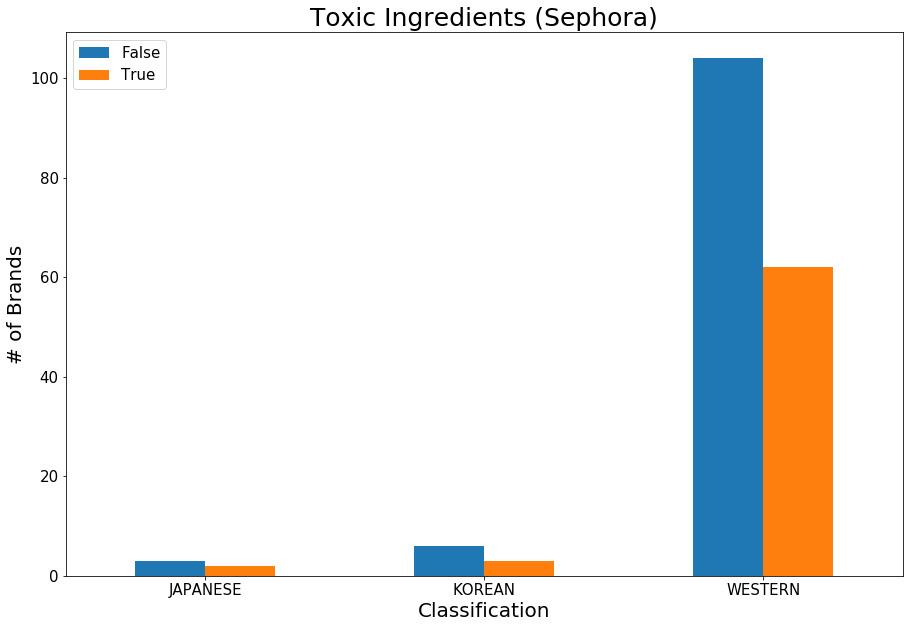

In [281]:
#Plot datapoints
ax = sephora_df_count.groupby(['Classification', 'Chem?']).sum()['# of Brands'].unstack().plot(kind='bar', stacked=False, figsize=[15,10])
ax.set_xlabel('Classification', fontsize=20)
ax.set_ylabel('# of Brands', fontsize=20)
ax.set_title('Toxic Ingredients (Sephora)', fontsize=25)
ax.tick_params(axis='both', labelsize=15)
ax.legend(loc='upper left', fontsize=15)
ax.tick_params(axis='x', rotation=0)

In [267]:
sephora_df2 = df2[['Label', 'brand', 'name', 'rank', 'Chem?', 'Classification']]
sephora_df2

,Label,brand,name,rank,Chem?,Classification
0,moisturizing-cream-oils-mists,LA MER,Crème de la Mer,4.1,False,WESTERN
1,moisturizing-cream-oils-mists,SK-II,Facial Treatment Essence,4.1,False,JAPANESE
2,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Protini™ Polypeptide Cream,4.4,False,WESTERN
3,moisturizing-cream-oils-mists,LA MER,The Moisturizing Soft Cream,3.8,False,WESTERN
4,moisturizing-cream-oils-mists,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,4.1,False,WESTERN
5,moisturizing-cream-oils-mists,TATCHA,The Water Cream,4.2,True,JAPANESE
6,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,4.2,False,WESTERN
7,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,4.4,False,WESTERN
8,moisturizing-cream-oils-mists,KIEHL'S SINCE 1851,Ultra Facial Cream,4.4,False,WESTERN
9,moisturizing-cream-oils-mists,LA MER,Little Miss Miracle Limited-Edition Crème de l...,5.0,False,WESTERN


In [293]:
#dataframe with nontoxic chemicals
sephora_df2_nochems = sephora_df2[sephora_df2['Chem?'] == False]
sephora_df2_nochems

,Label,brand,name,rank,Chem?,Classification
0,moisturizing-cream-oils-mists,LA MER,Crème de la Mer,4.1,False,WESTERN
1,moisturizing-cream-oils-mists,SK-II,Facial Treatment Essence,4.1,False,JAPANESE
2,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Protini™ Polypeptide Cream,4.4,False,WESTERN
3,moisturizing-cream-oils-mists,LA MER,The Moisturizing Soft Cream,3.8,False,WESTERN
4,moisturizing-cream-oils-mists,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,4.1,False,WESTERN
6,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,4.2,False,WESTERN
7,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,4.4,False,WESTERN
8,moisturizing-cream-oils-mists,KIEHL'S SINCE 1851,Ultra Facial Cream,4.4,False,WESTERN
9,moisturizing-cream-oils-mists,LA MER,Little Miss Miracle Limited-Edition Crème de l...,5.0,False,WESTERN
10,moisturizing-cream-oils-mists,FRESH,Lotus Youth Preserve Moisturizer,4.3,False,WESTERN


In [288]:
# group by rank, classifciation, count brand
groups2 = sephora_df2_nochems.groupby(['rank', 'Classification']).nunique('brand')
sephora_df2_groups = groups2
sephora_df2_groups

sephora_df2_groups = sephora_df2_groups.rename(columns={'brand': '# of Brands'})
sephora_df2_count = sephora_df2_groups[['# of Brands']]
sephora_df2_count = sephora_df2_count.sort_values(by=['# of Brands'], ascending=False)
sephora_df2_count.reset_index()

,rank,Classification,# of Brands
0,4.3,WESTERN,53
1,4.5,WESTERN,49
2,4.1,WESTERN,48
3,4.4,WESTERN,47
4,4.2,WESTERN,47
5,4.6,WESTERN,39
6,3.9,WESTERN,37
7,4.0,WESTERN,32
8,3.8,WESTERN,29
9,4.7,WESTERN,27


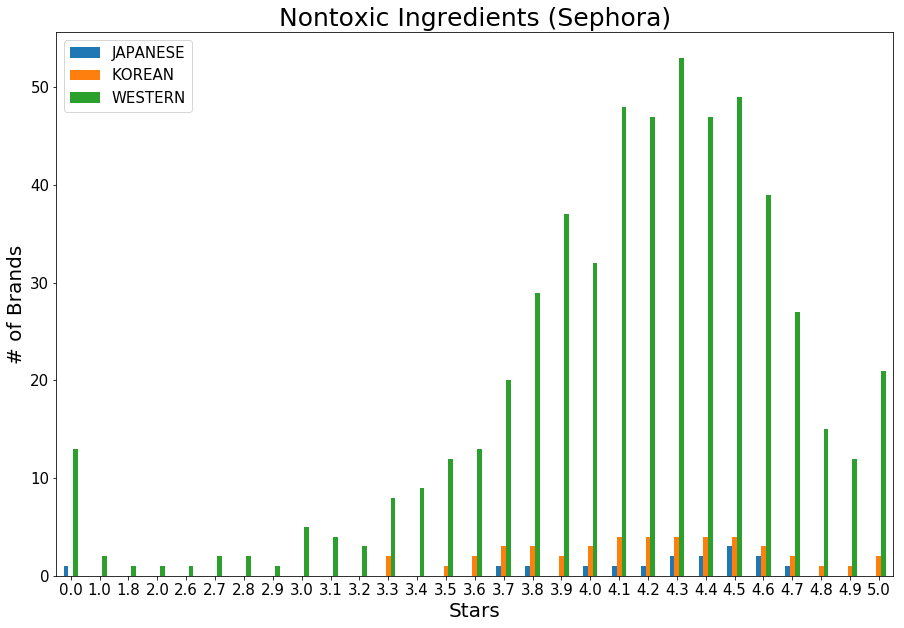

In [291]:
#Plot datapoints
ax = sephora_df2_count.groupby(['rank', 'Classification']).sum()['# of Brands'].unstack().plot(kind='bar', stacked=False, figsize=[15,10])
ax.set_xlabel('Stars', fontsize=20)
ax.set_ylabel('# of Brands', fontsize=20)
ax.set_title('Nontoxic Ingredients (Sephora)', fontsize=25)
ax.tick_params(axis='both', labelsize=15)
ax.legend(loc='upper left', fontsize=15)
ax.tick_params(axis='x', rotation=0)


In [295]:
#dataframe containing toxic chemicals
sephora_df3_chems = sephora_df2[sephora_df2['Chem?'] == True]
sephora_df3_chems

,Label,brand,name,rank,Chem?,Classification
5,moisturizing-cream-oils-mists,TATCHA,The Water Cream,4.2,True,JAPANESE
15,moisturizing-cream-oils-mists,DRUNK ELEPHANT,The Littles™,4.4,True,WESTERN
21,moisturizing-cream-oils-mists,BAREMINERALS,COMPLEXION RESCUE™ Tinted Moisturizer Broad Sp...,3.9,True,WESTERN
23,moisturizing-cream-oils-mists,FRESH,Black Tea Firming Overnight Mask,4.1,True,WESTERN
29,moisturizing-cream-oils-mists,SK-II,GenOptics Aura Essence Serum,4.1,True,JAPANESE
34,moisturizing-cream-oils-mists,IT COSMETICS,Your Skin But Better CC+ Cream Oil-Free Matte ...,3.9,True,WESTERN
35,moisturizing-cream-oils-mists,FARSÁLI,Unicorn Essence Antioxidant Primer Serum,3.9,True,WESTERN
39,moisturizing-cream-oils-mists,DR. JART+,Premium Beauty Balm SPF 45,4.2,True,KOREAN
47,moisturizing-cream-oils-mists,TARTE,Radiance Drops - Rainforest of the Sea™ Collec...,3.7,True,WESTERN
48,moisturizing-cream-oils-mists,SUNDAY RILEY,Tidal Brightening Enzyme Water Cream,4.2,True,WESTERN


In [296]:
# group by rank, classifciation, count brand
groups3 = sephora_df3_chems.groupby(['rank', 'Classification']).nunique('brand')
sephora_df3_groups = groups3
sephora_df3_groups

sephora_df3_groups = sephora_df3_groups.rename(columns={'brand': '# of Brands'})
sephora_df3_count = sephora_df3_groups[['# of Brands']]
sephora_df3_count = sephora_df3_count.sort_values(by=['# of Brands'], ascending=False)
sephora_df3_count.reset_index()

,rank,Classification,# of Brands
0,4.1,WESTERN,24
1,4.0,WESTERN,24
2,4.2,WESTERN,21
3,4.3,WESTERN,19
4,3.9,WESTERN,18
5,4.4,WESTERN,17
6,3.7,WESTERN,15
7,4.6,WESTERN,14
8,4.5,WESTERN,14
9,3.8,WESTERN,12


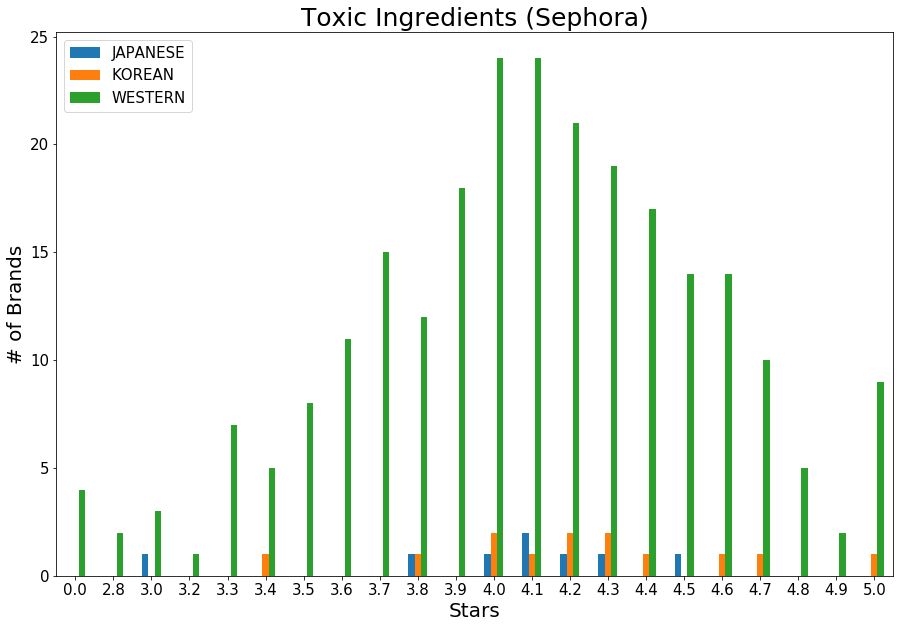

In [297]:
#Plot datapoints
ax = sephora_df3_count.groupby(['rank', 'Classification']).sum()['# of Brands'].unstack().plot(kind='bar', stacked=False, figsize=[15,10])
ax.set_xlabel('Stars', fontsize=20)
ax.set_ylabel('# of Brands', fontsize=20)
ax.set_title('Toxic Ingredients (Sephora)', fontsize=25)
ax.tick_params(axis='both', labelsize=15)
ax.legend(loc='upper left', fontsize=15)
ax.tick_params(axis='x', rotation=0)